In [1]:
from runtest import *
from Data_binary import *
from statistics import median

In [2]:
env = Data(unknown_rate=1)
env.loadfile("liver.csv") # change this to the test file
env.normalize()
env.alpha = 0
env.cluster_K_means(7)
# this makes it so when we do the ranking, we only check against this number
# of data points; ignore for now
#env.set_validation(2000)
# makes the costs uniform; we won't have groups either
env.set_costs()

# partition into training/test sets
test_env = env.split(0.80)
print("training points:", len(env.data))
print("test points:", len(test_env.data))

training points: 464
test points: 115


In [3]:
costs = [(i+1)/10 for i in range(10)] # list of maximum budgets
results = [] # stores all the results for each value of budget
for c in costs:
    env.max_cost = c
    test_env.max_cost = c
    # take the average of 3 trainings
    r1 = []
    r2 = []
    for i in range(3):
        rtemp = runtest(env,test_env)
        r1.append(rtemp[2])
        r2.append(rtemp[3])
    print("At cost:", c, median(r1), median(r2))
    results.append([r1,r2])

At cost: 0.1 789.4812827636893 778.9129750803523
At cost: 0.2 530.12510431629 681.4459442941762
At cost: 0.3 528.9595473969878 672.079455799524
At cost: 0.4 500.6285996245638 539.5779340948567
At cost: 0.5 374.74306882669345 494.0068793297846
At cost: 0.6 273.69457483085034 419.05802064501876
At cost: 0.7 284.3064086220501 340.4683316849974
At cost: 0.8 295.8479949065847 266.8585152238845
At cost: 0.9 185.933202799703 220.9641907075569
At cost: 1.0 177.51480134601428 177.51480134601428


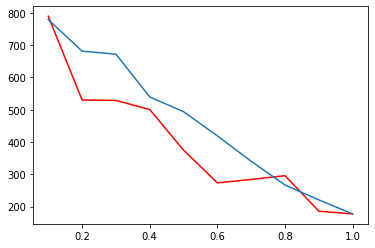

In [9]:
import matplotlib.pyplot as plt

# this value is the total distance between p and 5 closest predicted points to p
resRL = [median(results[i][0]) for i in range(len(results))]
resRAND = [median(results[i][1]) for i in range(len(results))]
plt.plot(costs, resRL, 'r', costs, resRAND)
plt.show()

In [5]:
# we will write the results to BENCHMARK/<test>.csv
f = open('BENCHMARK/liver_test.csv', 'w')

def write(f,lst):
    for l in lst:
        f.write(str(l))
        f.write(' ')

# first write the number of test points
f.write(str(len(test_env.data)))
f.write('\n')
        
# write the cost
write(f,costs)
f.write('\n')

# write the RL result
write(f,resRL)
f.write('\n')

# finally write the random results
write(f, resRAND)
f.write('\n')

f.close()